In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../src"))
from systems.lotka_volterra import simulate as simulate_lv
from systems.lorenz import simulate as simulate_lorenz

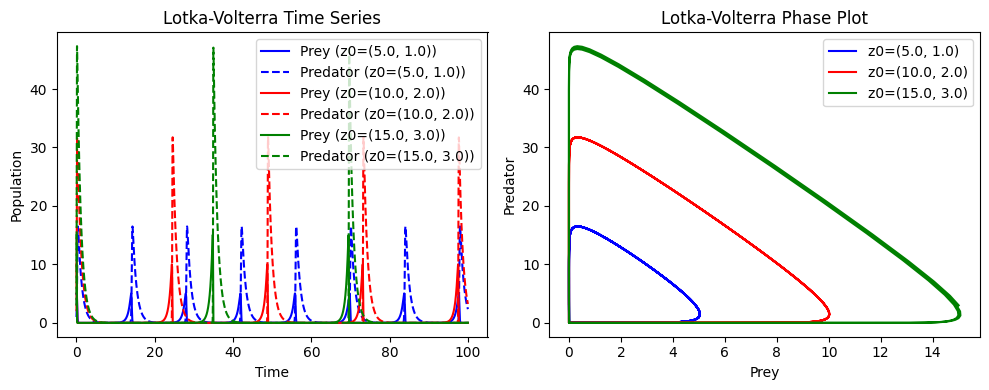

In [14]:
initial_conditions = [(5.0, 1.0), (10.0, 2.0), (15.0, 3.0)]
colors = ['blue', 'red', 'green', 'purple']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for z0, color in zip(initial_conditions, colors):
    t_lv, traj_lv = simulate_lv(z0=z0, t_max=100)
    plt.plot(t_lv, traj_lv[:, 0], label=f'Prey (z0={z0})', color=color)
    plt.plot(t_lv, traj_lv[:, 1], label=f'Predator (z0={z0})', linestyle='--', color=color)
plt.title("Lotka-Volterra Time Series")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()

plt.subplot(1, 2, 2)
for z0, color in zip(initial_conditions, colors):
    t_lv, traj_lv = simulate_lv(z0=z0, t_max=100)
    plt.plot(traj_lv[:, 0], traj_lv[:, 1], label=f'z0={z0}', color=color)
plt.title("Lotka-Volterra Phase Plot")
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.legend()
plt.tight_layout()
plt.show()

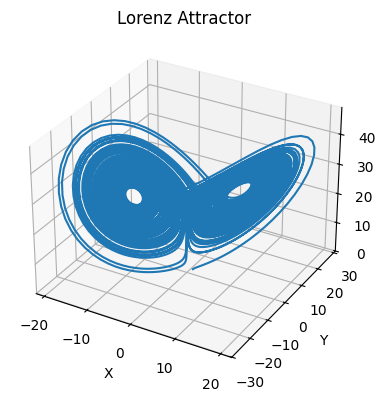

In [13]:
t_lorenz, traj_lorenz = simulate_lorenz(z0=(1.0, 1.0, 1.0), t_max=100)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj_lorenz[:, 0], traj_lorenz[:, 1], traj_lorenz[:, 2])
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()

In [ ]:
from utils.data_generator import generate_batch_from_config

generate_batch_from_config("../configs/lotka_volterra.yaml")
generate_batch_from_config("../configs/lorenz.yaml")

In [ ]:
!pip install pydmd

In [ ]:
import numpy as np
from pydmd import EDMD

def load_trajectory_for_dmd(npz_path, trajectory_index=0):
    """
    Loads a single trajectory and reshapes for PyDMD.
    Returns data in shape (n_features, n_time_steps).
    """
    data = np.load(npz_path, allow_pickle=True)["trajectories"]
    traj = data[trajectory_index]["traj"]
    return traj.T


X = load_trajectory_for_dmd("data/lotka_volterra.npz", trajectory_index=0)

# Fit DMD model
dmd = EDMD(svd_rank=10)
dmd.fit(X)


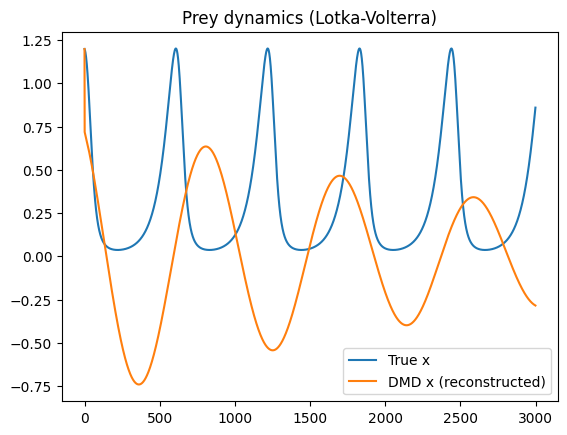

In [31]:
predicted = dmd.reconstructed_data.real

# Compare original vs. reconstructed
import matplotlib.pyplot as plt

plt.plot(X[0], label="True x")
plt.plot(predicted[0], label="DMD x (reconstructed)")
plt.legend()
plt.title("Prey dynamics (Lotka-Volterra)")
plt.show()
